# Reducción de Dimensionalidad (Caso Iris)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lectura de Datos

In [4]:
df = pd.read_csv('iris-data.csv')

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# 150 mediciones y 4 dimensiones
df.shape

(150, 4)

### Estandarización de los datos

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [9]:
# Visualicemos los datos escalados en un dataframe
pd.DataFrame(scaled_data, columns=df.columns)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


### Análisis de Dimensionalidad

In [10]:
# Importar
from sklearn.decomposition import PCA

In [11]:
# Separar las características
X = df.values

In [12]:
# Configurar PCA
pca = PCA(n_components=None)  # Extraer todos los componentes inicialmente
X_pca = pca.fit_transform(X)

In [13]:
exp_var_cumulativa = np.cumsum(pca.explained_variance_ratio_)
exp_var_cumulativa

array([0.92461621, 0.97763178, 0.99481691, 1.        ])

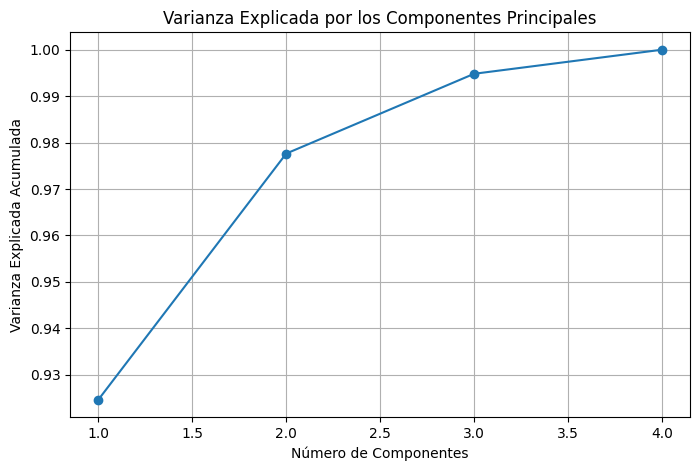

In [14]:
# Varianza explicada acumulada

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(exp_var_cumulativa) + 1), exp_var_cumulativa, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por los Componentes Principales')
plt.grid(True)
plt.show()



Los dos primeros componentes permiten explicar **aprox el 97.8% de la varianza** de los datos

### Reducción de Dimensionalidad

In [15]:
# vamos a aplicar la matriz de transformación a nuestros datos

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Mostrar la matriz de transformación (componentes principales)
print("Matriz de Transformación (Componentes Principales):")
print(pca.components_)


Matriz de Transformación (Componentes Principales):
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [16]:
# datos despues de aplicar reduccion de dimensionalidad

print("Datos después de la reducción de dimensionalidad:")
print(X_pca[:5])  # Muestra las primeras 5 observaciones proyectadas.

Datos después de la reducción de dimensionalidad:
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]


In [17]:
# datos originales antes de la reduccion de dimensionalidad
print("Datos Originales (Antes de la reducción de dimensionalidad):")
print(X[:5])  # Muestra las primeras 5 observaciones originales.


Datos Originales (Antes de la reducción de dimensionalidad):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


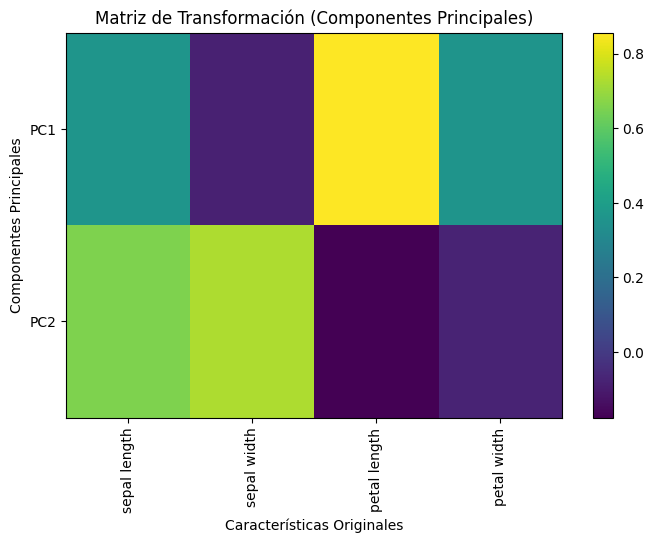

In [18]:
# visualizar la matriz de transformación

plt.figure(figsize=(8, 5))
plt.imshow(pca.components_, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(pca.n_components_), [f'PC{i+1}' for i in range(pca.n_components_)])
plt.xlabel('Características Originales')
plt.ylabel('Componentes Principales')
plt.title('Matriz de Transformación (Componentes Principales)')
plt.show()

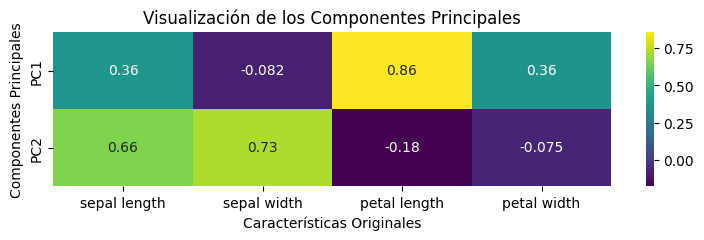

In [19]:
# Visualización de la matriz de componentes
plt.figure(figsize=(9, 2))
sns.heatmap(pca.components_, cmap='viridis', annot=True, cbar=True,
            xticklabels=df.columns,
            yticklabels=[f'PC{i+1}' for i in range(pca.n_components_)],
            )
plt.title('Visualización de los Componentes Principales')
plt.xlabel('Características Originales')
plt.ylabel('Componentes Principales')
plt.show()



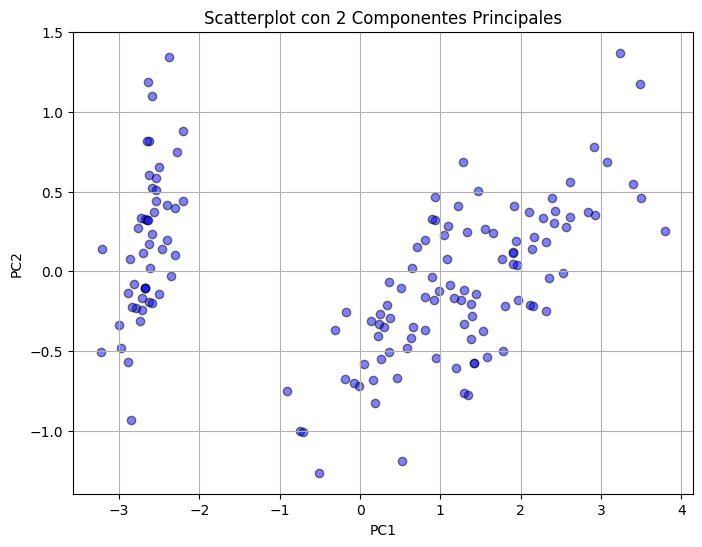

In [20]:
# COMPLETAR plt.scatter(...)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', alpha=0.5, edgecolors='k')  # Puedes cambiar 'b' por una variable de color para más visualización
plt.title('Scatterplot con 2 Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

### Análisis de Clusterización

In [21]:
from sklearn.cluster import KMeans

c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

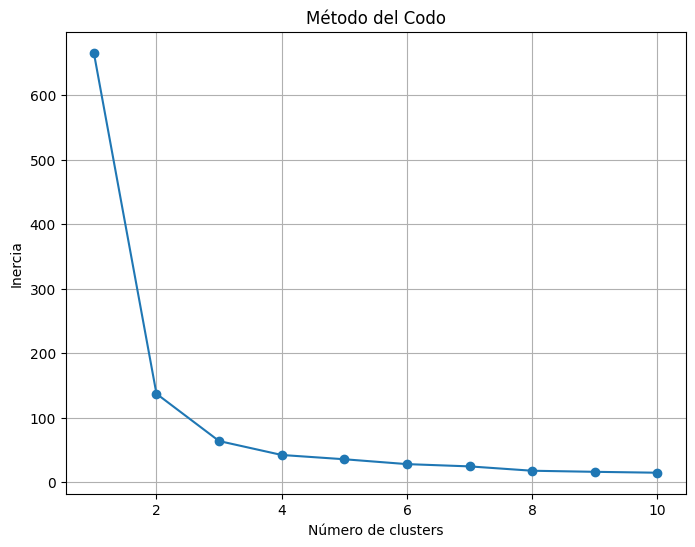

In [22]:
# Método del Codo
wcss = []
# Calcular la inercia para diferentes números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)  # Suponiendo que `X_reducido` es el resultado del PCA de dos componentes
    wcss.append(kmeans.inertia_)

# Completa el gráfico del Método del Codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

### Clusterización K-Means con k=3

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
df['Cluster'] = clusters

Centroides de K-Means:
[[ 2.34645113  0.27235455]
 [-2.64084076  0.19051995]
 [ 0.66443351 -0.33029221]]


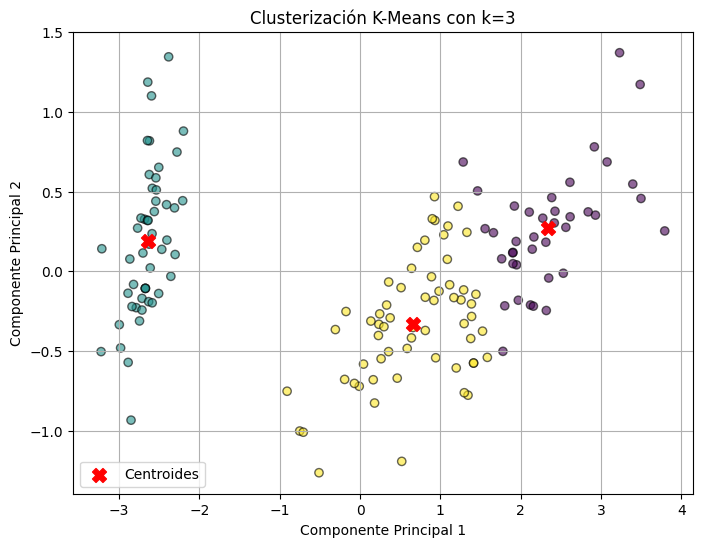

In [25]:
# desplegar centroides
centroides = kmeans.cluster_centers_
print("Centroides de K-Means:")
print(centroides)

# Visualización de los clusters junto con los centroides
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolor='k')

# Añadir los centroides al gráfico
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100, marker='X', label='Centroides')
plt.title('Clusterización K-Means con k=3')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend()
plt.show()

Etiquetas de clusters asignadas:
0    1
1    1
2    1
3    1
4    1
Name: Cluster, dtype: int32


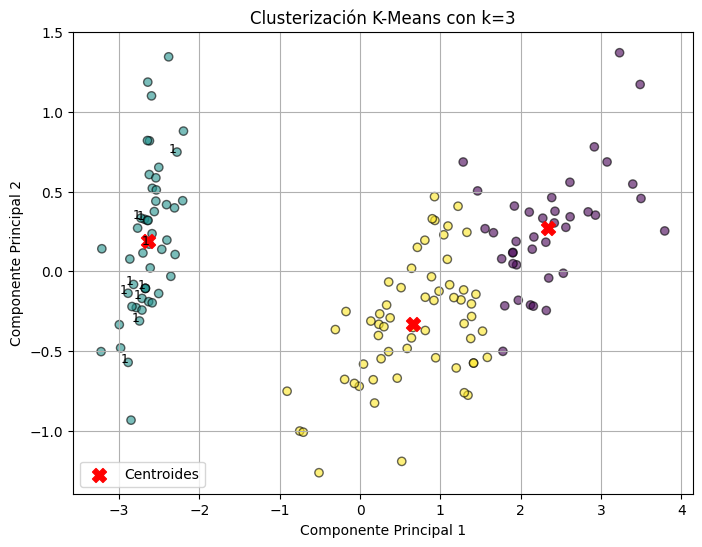

In [26]:
# desplegar etiquetas
print("Etiquetas de clusters asignadas:")
print(df['Cluster'].head())  # Muestra las primeras filas

# Visualización de los clusters junto con las etiquetas
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolor='k')

# Añadir los centroides al gráfico
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100, marker='X', label='Centroides')

# Anotar etiquetas cerca de los puntos para los primeros elementos
for i, txt in enumerate(clusters[:10]):  # Cambia [:10] a [:n] si deseas mostrar más etiquetas
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=9, ha='right')

plt.title('Clusterización K-Means con k=3')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
clases = pd.read_csv('iris-classes.csv')
clases

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [28]:
m = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
etiquetas_reales = clases['class'].map(m).values

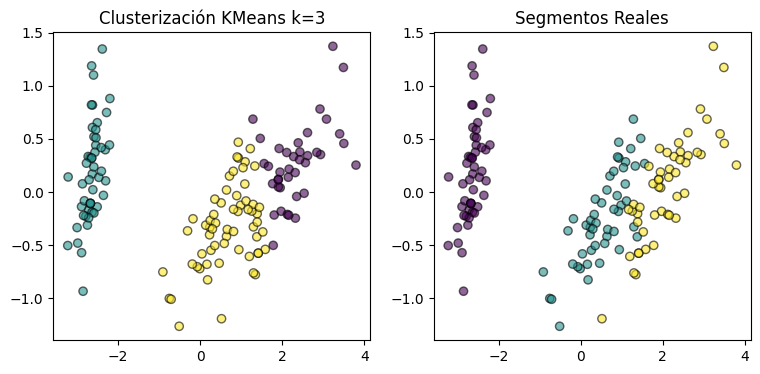

In [29]:
plt.figure(figsize=(9,4))

# Subgráfico para Clusterización K-Means
plt.subplot(1, 2, 1)
plt.title('Clusterización KMeans k=3')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolor='k')

# Subgráfico para Segmentos Reales
plt.subplot(1, 2, 2)
plt.title('Segmentos Reales')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas_reales, cmap='viridis', alpha=0.6, edgecolor='k')

plt.show()

### Clusterización con Gaussian Mixture

In [30]:
# import
from sklearn.mixture import GaussianMixture

In [31]:
# ajuste
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)


c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=3, random_state=42)

In [32]:
# predicciones de cluster para cada punto

gmm_clusters = gmm.predict(X_pca)

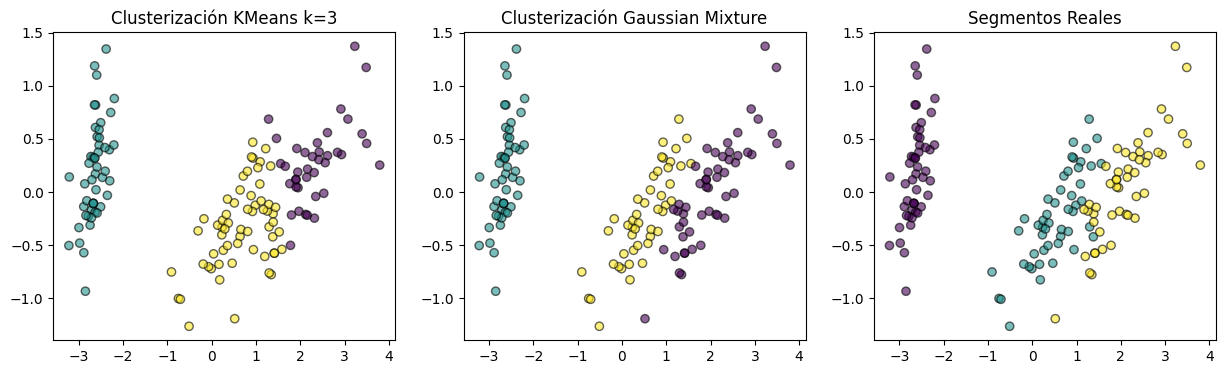

In [33]:
# Visualizar resultados
plt.figure(figsize=(15, 4))

# Clusterización K-Means
plt.subplot(1, 3, 1)
plt.title('Clusterización KMeans k=3')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolor='k')

# Clusterización Gaussian Mixture
plt.subplot(1, 3, 2)
plt.title('Clusterización Gaussian Mixture')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_clusters, cmap='viridis', alpha=0.6, edgecolor='k')

# Segmentos Reales
plt.subplot(1, 3, 3)
plt.title('Segmentos Reales')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas_reales, cmap='viridis', alpha=0.6, edgecolor='k')

plt.show()
